# 古典の計算の基礎

ここではpythonを用いた量子多体系の数値計算を行う方法について学ぶ

目標  
* 数値対角化を用いてエネルギー固有ベクトルと物理量の期待値を計算できるようになる
* Schrodinger方程式の時間発展を計算できるようになる 

発展
* 定常状態における期待値をミクロカノニカル平均/カノニカル平均と比較する

## 2準位系のまとめ

### qubit = 量子2準位系

原子のスピン，電子スピン，超伝導磁束などなど直交する2量子状態で完全系が張られる量子系

2量子状態を$|0\rangle$と$|1\rangle$, もしくは$|\uparrow\rangle$と$|\downarrow\rangle$と書くことにする

ヒルベルト空間の任意の状態は$|\psi\rangle=\psi_0|0\rangle+\psi_1|1\rangle$と表すことができる

ただし, $\psi_{0,1}$は複素数で$|\psi_0|^2+|\psi_1|^2=1$を満たす

状態は複素2次元のベクトルとして表すこともできる

$|0\rangle=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$, $|1\rangle=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$

$|\psi\rangle=\psi_0|0\rangle+\psi_1|1\rangle=\begin{pmatrix} \psi_0 \\ \psi_1 \end{pmatrix}$

二つの状態$|\psi\rangle$, $|\varphi\rangle$内積を$\langle\varphi|\psi\rangle$書くことにする

$\langle\varphi|\psi\rangle=\begin{pmatrix} \varphi^*_0 & \varphi^*_1 \end{pmatrix}\begin{pmatrix} \psi_0 \\ \psi_1 \end{pmatrix}=\varphi^*_0\psi_0+\varphi^*_1\psi_1 $

$\langle\psi|\psi\rangle=1$である

### パウリ行列の性質

量子2準位系に作用する演算子（パウリ行列）を定義する

$I=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$, $Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$, $X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$, $Y=\begin{pmatrix} 0 & -{\rm i} \\ {\rm i} & 0 \end{pmatrix}$

後々の便利のために$\sigma_\mu=(\sigma_{I},\sigma_{X},\sigma_{Y},\sigma_{Z})=(\sigma_0,\sigma_1,\sigma_2,\sigma_3)=(I,X,Y,Z)$を導入する

$\sigma_\mu$と書いた場合は$\mu=0,1,2,3$. $\sigma_i$と書いた場合は$i=1,2,3$の添え字を取るものとする.

パウリ行列の性質を列挙する

* パウリ行列はエルミートかつユニタリな行列である

  $\sigma_\mu^\dagger=\sigma_\mu$, $\sigma_\mu^\dagger\sigma_\mu=\sigma_\mu^2=I$

* パウリ行列のトレースはゼロである

  ${\rm Tr}\;\sigma_i=0$

* パウリ行列は反可換である
 
  例. $XY=-YX$

* $\sigma_i\sigma_j=\delta_{ij}+i\epsilon_{ijk}\sigma_k$ ただし, $\epsilon_{123}=1$

  例. $XY=iZ$, $YZ=iX$, $YX=-iZ$

* $Z$の固有値・固有ベクトル

  $Z|0\rangle=+1|0\rangle$, $Z|1\rangle=-1|1\rangle$

* $X$の固有値・固有ベクトル

  $X|+\rangle=+1|+\rangle$, $X|-\rangle=-1|-\rangle$

  $|+\rangle=H|0\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$, $|-\rangle=H|1\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$

  ここで, $H=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 &- 1\end{pmatrix}$をHadamard(アダマール) gateという. $H^2=1$が成り立つ（ユニタリ行列である）

  $H$は$Z$が対角的な基底から$X$が対角的な基底へのユニタリ変換(基底の変換行列)であるから, $HXH=Z$が成り立つ

  **量子回路上で$X$を測定する際に用いる**

  ### **問**

  $|+\rangle=H|0\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}$, $|-\rangle=H|1\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$ および $HXH=Z$を確かめよ 

* $Y$の固有値・固有ベクトル

  $Y|+_Y\rangle=+1|+_Y\rangle$, $Y|-_Y\rangle=-1|-_Y\rangle$

  $|+_Y\rangle=SH|0\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ {\rm i}\end{pmatrix}$, $|-_Y\rangle=SH|1\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$

  ここで, $S=\begin{pmatrix}1 & 0 \\ 0 & {\rm i}\end{pmatrix}$をPhase gateという. $SS^\dagger=1$が成り立つ（ユニタリ行列である）

  $X$と同様に, $(SH)^\dagger YSH=Z$が成り立つ

  **量子回路上で$Y$を測定する際に用いる**

    ### **問**

  $|+_Y\rangle=SH|0\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ {\rm i}\end{pmatrix}$, $|-_Y\rangle=SH|1\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}$ および $(SH)^\dagger YSH=Z$を確かめよ

* パウリ行列は複素$2$次元行列の完全系を成す

  $M=m_\mu \sigma_\mu$. ここで, $m_\mu=\frac{1}{2}{\rm Tr}[\sigma_\mu^\dagger M]$.


## 量子多体系のまとめ

量子多体系 = 多量子ビット系

例えば一次元スピン系は量子ビットが鎖状に並んだ系. 

2量子ビット系の任意状態は$|\psi\rangle=\psi_{00}|00\rangle+\psi_{01}|01\rangle+\psi_{10}|10\rangle+\psi_{11}|11\rangle$と表すことができる

ただし, $|ij\rangle\equiv|i\rangle\otimes|j\rangle$ [$i,j=0,1$] $\otimes$はテンソル積である

波動関数の規格化条件は$|\psi_{00}|^2+|\psi_{01}|^2+|\psi_{10}|^2+|\psi_{11}|^2=1$

同様にして$N$量子ット系の任意状態は$|\psi\rangle=\sum_{i_1,\ldots,i_N=0,1}\psi_{i_1\cdots i_N}|i_1\cdots i_N\rangle$

ただし, $|i_1\cdots i_N\rangle\equiv|i_1\rangle\otimes\cdots|i_N\rangle$ [$i_1,\ldots i_N=0,1$]

波動関数の規格化条件は$\sum_{i_1,\ldots,i_N=0,1}|\psi_{i_1\cdots i_N}|^2=1$

* パウリ行列のテンソル積は複素$2^N$次元行列の完全系を成す

  $H=\sum_{\mu_1\cdots\mu_N}h_{\mu_1\cdots\mu_N} \sigma_{\mu_1}\otimes\cdots\otimes\sigma_{\mu_N}$. ここで, $h_{\mu_1\cdots\mu_N}=\frac{1}{2^N}{\rm Tr}[\sigma^\dagger_{\mu_1}\otimes\cdots\otimes\sigma^\dagger_{\mu_N} H]$.

したがって, ヒルベルト空間のサイズが同じであればスピン系の問題にマップすることが可能である. 例: $1$次元自由フェルミオンと$1$次元量子XY模型

* 以降$I_1\otimes\cdots\otimes Z_n \otimes\cdots\otimes I$のような場合は単に$Z_n$と書いて単位行列のテンソル積を省略する

* 以降$I_1\otimes\cdots\otimes Z_n \otimes Z_{n+1}\otimes\cdots\otimes I$のような場合は単に$Z_nZ_{n+1}$と書いて単位行列のテンソル積を省略する

* 数値計算する際はテンソル積の定義通りに計算し, 行列を求める必要がある

## テンソル積からクロネッカー積へ

数値計算ではしばしば多脚のテンソルではなく大きな行列とベクトルの演算として扱う 


* $|01\rangle=\begin{pmatrix} 1 \\ 0 \end{pmatrix}\otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix}=\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0\end{pmatrix}$

  $|\psi\rangle=\sum_{i_1,\ldots,i_N}\psi_{i_1\cdots i_N}|i_1\cdots i_N\rangle=\sum_{i=1}^{2^N}\psi(i)|i\rangle$

* $Z\otimes Z =\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}\otimes \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}=\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$

# 横磁場イジング模型

$1$次元の場合のハミルトニアン $H = -\sum_{i=1}^N Z_{i}Z_{i+1}-m\sum_{i=1}^NZ_i-h\sum_{i=1}^NX_i$

周期境界条件の場合は$Z_{N+1}=Z_1$と解釈する. 開放境界条件の場合は$Z_{N+1}=0$と解釈する. 


### **問**

$N=2$の場合に開放境界条件のハミルトニアンを行列として陽に書き下せ. 

### **解**

$H=\begin{pmatrix} -1-2m & -h & -h & -h \\ -h & 1 & 0 & 0 \\ -h & 0 & 1 & -h \\ 0 & -h & -h & -1+2m \end{pmatrix}$

# 基底状態の性質

$m=0$とする

$|h|\ll1$の場合の基底状態は$H = -\sum_{i=1}^N Z_{i}Z_{i+1}$

波動関数は$|\psi\rangle=|\uparrow\cdots\uparrow\rangle$もしくは$|\psi\rangle=|\downarrow\cdots\downarrow\rangle$で$2$重縮退している. 

${\bf Z}_2$対称性が自発的な破れた状態. 強磁性相

$|h|\gg1$の場合の基底状態は$H = -h\sum_{i=1}^N X_{i}$

波動関数は$h>0$とすると$|\psi\rangle=|+\cdots+\rangle$ 

自発的な対称性の破れはない. 常磁性相 (外部磁場を印加することでスピンが$1$方向に揃った状態)

$h$の大きさを変えることで強磁性相と常磁性相の間で$2$次相転移が起きることが知られている

$m=0$の場合はJordan-Wigner変換により自由Majorana fermionへとマップすることができ, 解析的に解くことができる

# 厳密対角化を用いた計算

In [37]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

In [125]:
class TFI:
    
    def __init__(self, N: int) -> None:
        """Instantiate a YM theory.
        Args:
            N: system size
        """
        self.N = N
        self.Z = np.array([[1,0],[0,-1]])
        self.X = np.array([[0,1],[1, 0]])

    def ZZchain(self) -> float:

        H=np.zeros((2**self.N,2**self.N))

        for ii in range(self.N-1):
            H+=np.kron(np.eye(2**(self.N-ii-2)),np.kron(np.kron(self.Z,self.Z),np.eye(2**(ii))))

        H+=np.kron(self.Z,np.kron(np.eye(2**(self.N-2)),self.Z))

        return H

    def ZZlongchain(self) -> float:

        H=np.zeros((2**self.N,2**self.N))
        H+=np.kron(np.eye(2**(self.N//2-1)),np.kron(self.Z,np.kron(np.eye(2**(self.N//2-1)),self.Z)))

        return H
    
    def Xchain(self) -> float:

        H=np.zeros((2**self.N,2**self.N))

        for ii in range(self.N):
            H+=np.kron(np.eye(2**(self.N-ii-1)),np.kron(self.X,np.eye(2**ii)))
            
        return H

    def Zchain(self) -> float:

        H=np.zeros((2**self.N,2**self.N))

        for ii in range(self.N):
            H+=np.kron(np.eye(2**(self.N-ii-1)),np.kron(self.Z,np.eye(2**ii)))
            
        return H
    
    def diagonalization(self) -> float:

        d=40
        ep=np.zeros(d)
        vec=np.zeros((2**self.N,d))
        h =0.05*np.arange(d)
        
        H1=self.ZZchain()
        H2=self.Xchain()

        for ii in range(d):
            H=-H1-h[ii]*H2
            tmp1,tmp2=eigh(H)
            ep[ii]=tmp1[0]
            vec[:,ii]=tmp2[:,0]
            
        return ep, vec
    
    def measurement(self):
        Xop=self.Xchain()
        Zop=self.ZZlongchain()

        ep,vec=self.diagonalization()

        return ep, vec.transpose().dot(Xop.dot(vec)).diagonal(), vec.transpose().dot(Zop.dot(vec)).diagonal()
        

In [126]:
N=8
q=TFI(N)
ep,X,Z=q.measurement()

N=10
q=TFI(N)
ep2,X2,Z2=q.measurement()

N=12
q=TFI(N)
ep3,X3,Z3=q.measurement()

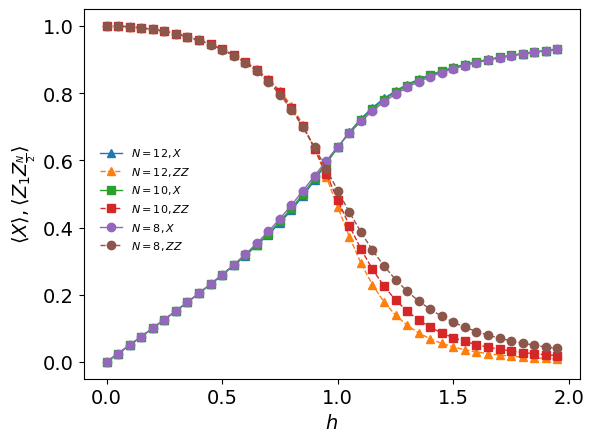

In [131]:
d = 40
h =0.05*np.arange(d)

N=12
#plt.plot(h,ep3/N,'^:', linewidth=1,label=rf"$N={N}, \varepsilon$")
plt.plot(h,X3/N,'^-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z3,'^--', linewidth=1,label=rf"$N={N}, ZZ$")
N=10
#plt.plot(h,ep2/N,'s:', linewidth=1,label=rf"$N={N}, \varepsilon$")
plt.plot(h,X2/N,'s-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z2,'s--', linewidth=1,label=rf"$N={N}, ZZ$")
N=8
#plt.plot(h,ep/N,'o:', linewidth=1,label=rf"$N={N}, \varepsilon$")
plt.plot(h,X/N,'o-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z,'o--', linewidth=1,label=rf"$N={N}, ZZ$")

plt.xlabel(r"$h$", fontsize=14)
plt.ylabel(r"$\langle X\rangle, \langle Z_1Z_{\frac{N}{2}}\rangle$", fontsize=14)
plt.tick_params(labelsize=14)
#plt.xlim([1.0,2.0])
#plt.ylim([-1,1])
legend =plt.legend(bbox_to_anchor=(0, 0.3), loc='lower left', borderaxespad=1, fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0)
plt.show()

# スパース行列とKrylov法を用いた計算

In [132]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import eigsh

import matplotlib.pyplot as plt

In [138]:
class TFI:
    
    def __init__(self, N: int) -> None:
        """Instantiate a YM theory.
        Args:
            N: system size
        """
        self.N = N
        self.Z = sparse.csr_matrix(np.array([[1.,0.],[0.,-1.]]))
        self.X = sparse.csr_matrix(np.array([[0.,1.],[1.,0.]]))
    
    def speye(self,a):
        return sparse.eye(2**a,format="csr")

    def skron(self,a,b):
        return sparse.kron(a,b,format="csr")

    def ZZchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))

        for ii in range(self.N-1):
            H+=self.skron(self.speye(self.N-ii-2),self.skron(self.skron(self.Z,self.Z),self.speye(ii)))

        H+=self.skron(self.Z,self.skron(self.speye(self.N-2),self.Z))

        return H

    def ZZlongchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))
        H+=self.skron(self.speye(self.N//2-1),self.skron(self.Z,self.skron(self.speye(self.N//2-1),self.Z)))

        return H
    
    def Xchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))

        for ii in range(self.N):
            H+=self.skron(self.speye(self.N-ii-1),self.skron(self.X,self.speye(ii)))
            
        return H

    def Zchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))

        for ii in range(self.N):
            H+=self.spkron(self.speye(self.N-ii-1),self.skron(self.Z,self.speye(ii)))
            
        return H
    
    def diagonalization(self) -> float:

        d=40
        dK=12
        ep=np.zeros(d)
        vec=np.zeros((2**self.N,d))
        h =0.05*np.arange(d)
        
        H1=self.ZZchain()
        H2=self.Xchain()
        
        for ii in range(d):
            H=-H1-h[ii]*H2
            tmp1,tmp2=eigsh(H,k=dK,which='SA')
            ep[ii]=tmp1[0]
            vec[:,ii]=tmp2[:,0]
            
        return ep, vec
    
    def measurement(self):
        Xop=self.Xchain()
        Zop=self.ZZlongchain()

        ep,vec=self.diagonalization()

        return ep, vec.transpose().dot(Xop.dot(vec)).diagonal(), vec.transpose().dot(Zop.dot(vec)).diagonal()
        

In [143]:
N=8
q=TFI(N)
ep,X,Z=q.measurement()

N=10
q=TFI(N)
ep2,X2,Z2=q.measurement()

N=12
q=TFI(N)
ep3,X3,Z3=q.measurement()

N=14
q=TFI(N)
ep4,X4,Z4=q.measurement()

N=16
q=TFI(N)
ep5,X5,Z5=q.measurement()

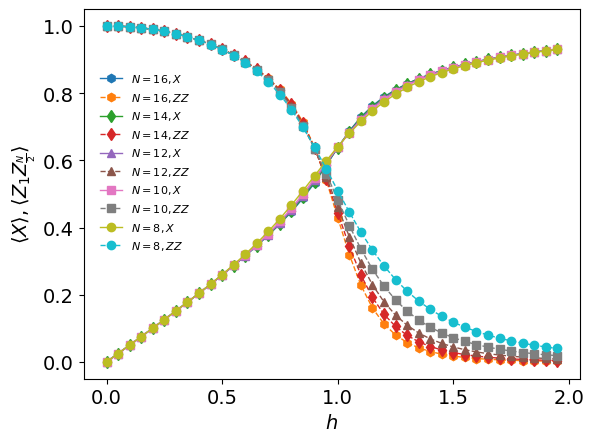

In [144]:
d = 40
h =0.05*np.arange(d)

N=16
plt.plot(h,X5/N,'h-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z5,'h--', linewidth=1,label=rf"$N={N}, ZZ$")
N=14
plt.plot(h,X4/N,'d-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z4,'d--', linewidth=1,label=rf"$N={N}, ZZ$")
N=12
#plt.plot(h,ep3/N,'^:', linewidth=1,label=rf"$N={N}, \varepsilon$")
plt.plot(h,X3/N,'^-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z3,'^--', linewidth=1,label=rf"$N={N}, ZZ$")
N=10
#plt.plot(h,ep2/N,'s:', linewidth=1,label=rf"$N={N}, \varepsilon$")
plt.plot(h,X2/N,'s-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z2,'s--', linewidth=1,label=rf"$N={N}, ZZ$")
N=8
#plt.plot(h,ep/N,'o:', linewidth=1,label=rf"$N={N}, \varepsilon$")
plt.plot(h,X/N,'o-', linewidth=1,label=rf"$N={N}, X$")
plt.plot(h,Z,'o--', linewidth=1,label=rf"$N={N}, ZZ$")

plt.xlabel(r"$h$", fontsize=14)
plt.ylabel(r"$\langle X\rangle, \langle Z_1Z_{\frac{N}{2}}\rangle$", fontsize=14)
plt.tick_params(labelsize=14)
#plt.xlim([1.0,2.0])
#plt.ylim([-1,1])
legend =plt.legend(bbox_to_anchor=(0, 0.3), loc='lower left', borderaxespad=1, fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0)
plt.show()

# 固有状態熱化仮説の検証

In [31]:
import numpy as np
from scipy.linalg import eigh

import matplotlib.pyplot as plt

In [34]:
class TFI:
    
    def __init__(self, N: int, m: float, h: float, delta: float) -> None:
        """Instantiate a YM theory.
        Args:
            N: system size
            m: longitudinal field strength
            h: transverse field strength
            delta: disorder field strength
        """
        self.N = N
        self.m = m
        self.h = h
        self.delta = delta
        self.Z = np.array([[1,0],[0,-1]])
        self.X = np.array([[0,1],[1, 0]])

    def Hamiltonian(self):

        H=np.zeros((2**self.N,2**self.N))

        for ii in range(self.N-1):
            H-=np.kron(np.eye(2**(self.N-ii-2)),np.kron(np.kron(self.Z,self.Z),np.eye(2**(ii))))

        H-=np.kron(self.Z,np.kron(np.eye(2**(self.N-2)),self.Z))

        for ii in range(self.N):
            H-=(self.h+self.delta*np.random.randn())*np.kron(np.eye(2**(self.N-ii-1)),np.kron(self.X,np.eye(2**ii)))
    
        for ii in range(self.N):
            H-=self.m*np.kron(np.eye(2**(self.N-ii-1)),np.kron(self.Z,np.eye(2**(ii))))
        
        return H
    
    def diagonalization(self):
    
        H=self.Hamiltonian()
        ep,vec=eigh(H)
        return ep, vec

    def measurement(self):
        Xop=np.zeros((2**self.N,2**self.N))

        for ii in range(self.N):
            Xop+=self.h*np.kron(np.eye(2**(self.N-ii-1)),np.kron(self.X,np.eye(2**ii)))

        Xop=Xop/self.N
        ep,vec=self.diagonalization()

        S=np.zeros(len(ep))
        for ii in range(len(ep)):
            vectmp=vec[:,ii]
            vectmp=vectmp.reshape(2**(N//2),-1)
            rho=vectmp.dot(vectmp.transpose())
            s,_=eigh(rho)
            s+=10**(-10)
            S[ii]=-s.dot(np.log(s))

        return ep, vec.transpose().dot(Xop.dot(vec)).diagonal(), S
        

In [35]:
m=0.5
h=1.05
delta=0.

N=8
q=TFI(N,m,h,delta)
ep,X,S=q.measurement()

N=10
q=TFI(N,m,h,delta)
ep2,X2,S2=q.measurement()

N=12
q=TFI(N,m,h,delta)
ep3,X3,S3=q.measurement()

N=14
q=TFI(N,m,h,delta)
ep4,X4,S4=q.measurement()

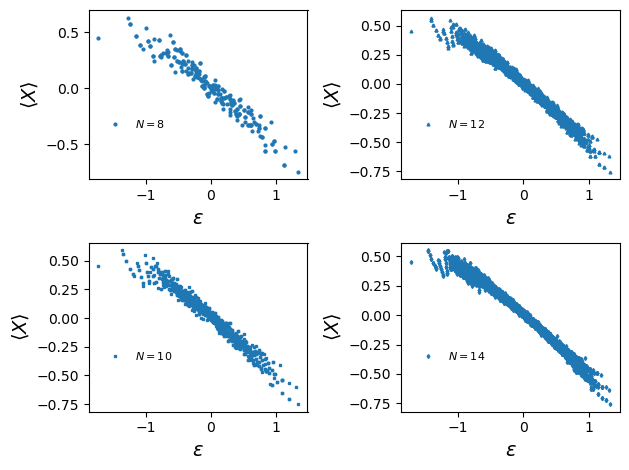

In [38]:
fig, axes= plt.subplots(2,2, tight_layout=True)   
N=8
axes[0][0].plot(ep/N,X,'o',markersize=2,label=rf"$N={N}$")
axes[0][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][0].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[0][0].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=10
axes[1][0].plot(ep2/N,X2,'s',markersize=2,label=rf"$N={N}$")
axes[1][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][0].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[1][0].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=12
axes[0][1].plot(ep3/N,X3,'^',markersize=2,label=rf"$N={N}$")
axes[0][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][1].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[0][1].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=14
axes[1][1].plot(ep4/N,X4,'d',markersize=2,label=rf"$N={N}$")
axes[1][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][1].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[1][1].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

plt.show()

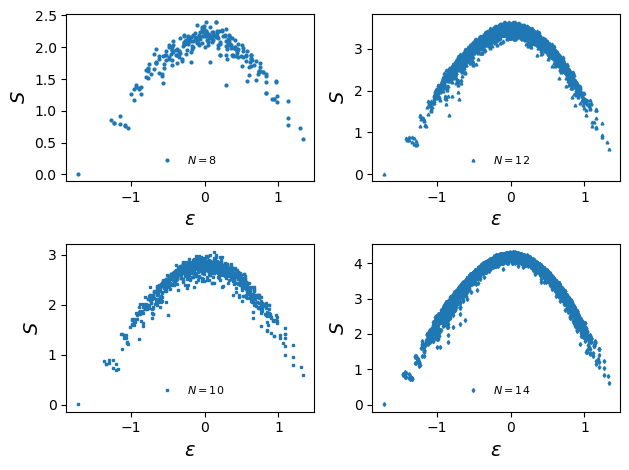

In [37]:
fig, axes= plt.subplots(2,2, tight_layout=True)   
N=8
axes[0][0].plot(ep/N,S,'o',markersize=2,label=rf"$N={N}$")
axes[0][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][0].set_ylabel(r"$S$", fontsize=14)
axes[0][0].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=10
axes[1][0].plot(ep2/N,S2,'s',markersize=2,label=rf"$N={N}$")
axes[1][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][0].set_ylabel(r"$S$", fontsize=14)
axes[1][0].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=12
axes[0][1].plot(ep3/N,S3,'^',markersize=2,label=rf"$N={N}$")
axes[0][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][1].set_ylabel(r"$S$", fontsize=14)
axes[0][1].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=14
axes[1][1].plot(ep4/N,S4,'d',markersize=2,label=rf"$N={N}$")
axes[1][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][1].set_ylabel(r"$S$", fontsize=14)
axes[1][1].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

plt.show()

In [39]:
m=0.0
h=1.0
delta=0.

N=8
q=TFI(N,m,h,delta)
ep,X,S=q.measurement()

N=10
q=TFI(N,m,h,delta)
ep2,X2,S2=q.measurement()

N=12
q=TFI(N,m,h,delta)
ep3,X3,S3=q.measurement()

N=14
q=TFI(N,m,h,delta)
ep4,X4,S4=q.measurement()

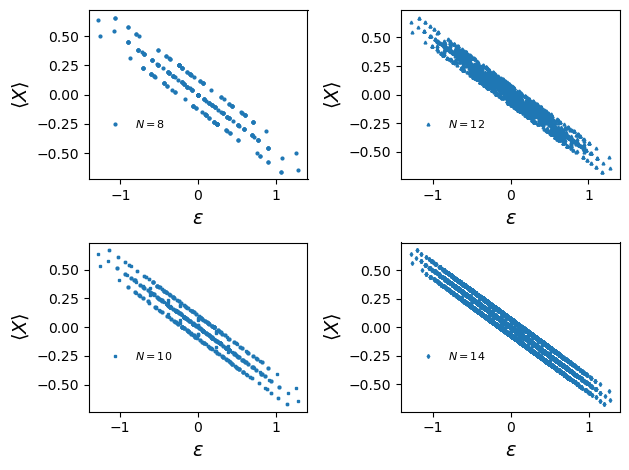

In [40]:
fig, axes= plt.subplots(2,2, tight_layout=True)   
N=8
axes[0][0].plot(ep/N,X,'o',markersize=2,label=rf"$N={N}$")
axes[0][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][0].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[0][0].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=10
axes[1][0].plot(ep2/N,X2,'s',markersize=2,label=rf"$N={N}$")
axes[1][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][0].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[1][0].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=12
axes[0][1].plot(ep3/N,X3,'^',markersize=2,label=rf"$N={N}$")
axes[0][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][1].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[0][1].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=14
axes[1][1].plot(ep4/N,X4,'d',markersize=2,label=rf"$N={N}$")
axes[1][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][1].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[1][1].legend(bbox_to_anchor=(0, 0.2), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

plt.show()

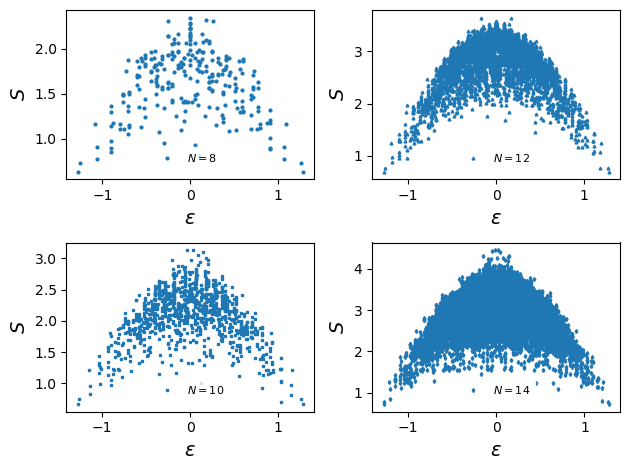

In [41]:
fig, axes= plt.subplots(2,2, tight_layout=True)   
N=8
axes[0][0].plot(ep/N,S,'o',markersize=2,label=rf"$N={N}$")
axes[0][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][0].set_ylabel(r"$S$", fontsize=14)
axes[0][0].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=10
axes[1][0].plot(ep2/N,S2,'s',markersize=2,label=rf"$N={N}$")
axes[1][0].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][0].set_ylabel(r"$S$", fontsize=14)
axes[1][0].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=12
axes[0][1].plot(ep3/N,S3,'^',markersize=2,label=rf"$N={N}$")
axes[0][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[0][1].set_ylabel(r"$S$", fontsize=14)
axes[0][1].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

N=14
axes[1][1].plot(ep4/N,S4,'d',markersize=2,label=rf"$N={N}$")
axes[1][1].set_xlabel(r"$\varepsilon$", fontsize=14)
axes[1][1].set_ylabel(r"$S$", fontsize=14)
axes[1][1].legend(bbox_to_anchor=(0.3, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

plt.show()

# 量子クエンチ

In [2]:
import numpy as np
from scipy.linalg import eigh
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import expm_multiply as expm

import matplotlib.pyplot as plt

In [37]:
class TFI:
    
    def __init__(self, N: int, m: float, h: float) -> None:
        """Instantiate a YM theory.
        Args:
            N: system size
            m: longitudinal field strength
            h: transverse field strength
        """
        self.N = N
        self.m = m
        self.h = h
        self.Z = sparse.csr_matrix(np.array([[1.,0.],[0.,-1.]]))
        self.X = sparse.csr_matrix(np.array([[0.,1.],[1.,0.]]))
    
    def speye(self,a):
        return sparse.eye(2**a,format="csr")

    def skron(self,a,b):
        return sparse.kron(a,b,format="csr")

    def ZZchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))

        for ii in range(self.N-1):
            H+=self.skron(self.speye(self.N-ii-2),self.skron(self.skron(self.Z,self.Z),self.speye(ii)))

        H+=self.skron(self.Z,self.skron(self.speye(self.N-2),self.Z))

        return H

    def ZZlongchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))
        H+=self.skron(self.speye(self.N//2-1),self.skron(self.Z,self.skron(self.speye(self.N//2-1),self.Z)))

        return H
    
    def Xchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))

        for ii in range(self.N):
            H+=self.skron(self.speye(self.N-ii-1),self.skron(self.X,self.speye(ii)))
            
        return H

    def Zchain(self) -> float:

        H=sparse.csr_matrix((2**self.N,2**self.N))

        for ii in range(self.N):
            H+=self.skron(self.speye(self.N-ii-1),self.skron(self.Z,self.speye(ii)))
            
        return H

    def evolution_Krylov(self,T,t,psi0,dt=0.001):

        psi=psi0.copy()
        step=int(t/dt)
        ts=int(T/(dt*step))
    
        H1=self.ZZchain()
        H2=self.Zchain()
        H3=self.Xchain()
        obs=self.ZZlongchain()
        H=-H1-self.m*H2-self.h*H3
    
        time=step*dt*np.arange(ts+1)
        x=np.zeros(ts+1)
        y=np.zeros(ts+1)
        z=np.zeros(ts+1)
        w=np.zeros(ts+1)
    
        #measurement
        psitemp=obs*psi
        tmp = psitemp.dot(psi)
        x[0] = tmp.real
        psitemp=H3*psi
        tmp = psitemp.dot(psi)
        y[0] = tmp.real
        tmp = np.abs(psi0.dot(psi))**2
        z[0] = tmp
        
        psitmp=psi.reshape(2**(N//2),-1)
        rho=psitmp.dot(psitmp.transpose())
        s,_=eigh(rho)
        s+=10**(-10)
        w[0]=-s.dot(np.log(s))        
        
        for ii in range(ts):
            for _ in range(step):
                psi=expm(-1j*dt*H,psi)
            #measurement
            psitemp=obs*psi
            tmp = psitemp.dot(psi.conjugate())
            x[ii+1] = tmp.real
            psitemp=H3*psi
            tmp = psitemp.dot(psi.conjugate())
            y[ii+1] = tmp.real
            tmp = np.abs(psi.dot(psi0))**2
            z[ii+1] = tmp
        
            psitmp=psi.copy()
            psitmp=psitmp.reshape(2**(N//2),-1)
            rho=psitmp.dot(psitmp.transpose().conjugate())
            s,_=eigh(rho)
            s+=10**(-10)
            w[ii+1]=-s.dot(np.log(s))        
        
        
        return time,x,y,z,w

    def microcanonical(self,psi0,d=16):

        H1=self.ZZchain()
        H2=self.Zchain()
        H3=self.Xchain()
        obs=self.ZZlongchain()
        H=-H1-self.m*H2-self.h*H3
        psitmp=H*psi0
        energy=psitmp.dot(psi0)
        ep,vec=eigsh(H,k=d,sigma=energy)
        tmp =( (vec.T.conjugate()).dot(obs*vec) ).diagonal()
        tmp2=( (vec.T.conjugate()).dot(H3*vec) ).diagonal()
        
        return np.mean(tmp).real, np.mean(tmp2).real
    
    def canonical(self,psi0,stat=50,err=5*10**(-3),dt=0.005):

        H1=self.ZZchain()
        H2=self.Zchain()
        H3=self.Xchain()
        obs=self.ZZlongchain()
        H=-H1-self.m*H2-self.h*H3
        psitmp=H*psi0
        energy=psitmp.dot(psi0)

        psi=np.random.randn(2**N,stat)

        for ii in range(stat):
            psitmp=psi[:,ii]
            psi[:,ii]*=1.0/np.sqrt(psitmp.dot(psitmp))

        psitmp=H*psi
        tmp=( (psi.T.conjugate()).dot(psitmp) ).diagonal()
        enegytmp=np.mean(tmp).real
        
        while(np.abs((enegytmp-energy)/energy)>err):
            psi=expm(-dt*H,psi)
        
            for ii in range(stat):
                psitmp=psi[:,ii]
                psi[:,ii]*=1.0/np.sqrt(psitmp.dot(psitmp))
        
            psitmp=H*psi
            tmp=( (psi.T.conjugate()).dot(psitmp) ).diagonal()
            enegytmp=np.mean(tmp).real
        
        psitmp=obs*psi
        tmp=np.diagonal( (psi.T.conjugate()).dot(psitmp) )
        psitmp=H3*psi
        tmp2=np.diagonal( (psi.T.conjugate()).dot(psitmp) )

        return np.mean(tmp).real, np.mean(tmp2).real

In [44]:
N=14
m=0.5
h=1.05
T=10
t=0.05
psi=np.zeros(2**N)
psi[0]=1.
q=TFI(N,m,h)

In [45]:
time,x,y,z,w=q.evolution_Krylov(T,t,psi)

In [46]:
x_mic,y_mic=q.microcanonical(psi)
x_can,y_can=q.canonical(psi)

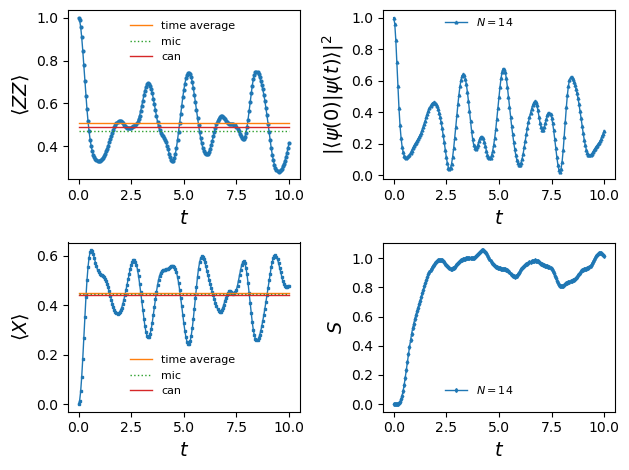

In [47]:
fig, axes= plt.subplots(2,2, tight_layout=True)   

axes[0][0].plot(time,x,'o-',linewidth=1,markersize=2)
axes[0][0].plot(time,0*x+np.mean(x[100:]),'-',linewidth=1,label=rf"time average")
axes[0][0].plot(time,0*x+x_mic,':',linewidth=1,label=rf"mic")
axes[0][0].plot(time,0*x+x_can,'-',linewidth=1,label=rf"can")
axes[0][0].set_xlabel(r"$t$", fontsize=14)
axes[0][0].set_ylabel(r"$\langle ZZ\rangle$", fontsize=14)
axes[0][0].legend(bbox_to_anchor=(0.2, 0.6), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

axes[1][0].plot(time,y/N,'s-',linewidth=1,markersize=2)
axes[1][0].plot(time,0*y+np.mean(y)/N,'-',linewidth=1,label=rf"time average")
axes[1][0].plot(time,0*y+y_mic/N,':',linewidth=1,label=rf"mic")
axes[1][0].plot(time,0*y+y_can/N,'-',linewidth=1,label=rf"can")
axes[1][0].set_xlabel(r"$t$", fontsize=14)
axes[1][0].set_ylabel(r"$\langle X\rangle$", fontsize=14)
axes[1][0].legend(bbox_to_anchor=(0.2, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

axes[0][1].plot(time,z,'^-',linewidth=1,markersize=2,label=rf"$N={N}$")
axes[0][1].set_xlabel(r"$t$", fontsize=14)
axes[0][1].set_ylabel(r"$|\langle\psi(0)|\psi(t)\rangle|^2$", fontsize=14)
axes[0][1].legend(bbox_to_anchor=(0.2, 0.8), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

axes[1][1].plot(time,w,'d-',linewidth=1,markersize=2,label=rf"$N={N}$")
axes[1][1].set_xlabel(r"$t$", fontsize=14)
axes[1][1].set_ylabel(r"$S$", fontsize=14)
axes[1][1].legend(bbox_to_anchor=(0.2, 0.), loc='lower left', borderaxespad=1, fontsize=8, edgecolor='white')

plt.show()

### **問**

TFI模型についてパラメータおよび初期状態 (Xの固有状態, Anti-ferroの基底状態, Domain-wallのある状態を用意する...)を変えて熱化の計算を行なってみよ. 

### **問**

PXP模型: $H=-\sum_{i=1}^{N}P_{i-1}X_i P_{i+1}$について$|\psi(0)\rangle=|\uparrow\cdots\uparrow\rangle$, $|\psi(0)\rangle=|\uparrow\downarrow\cdots\uparrow\downarrow\rangle$を初期条件として熱化の計算を行なってみよ. 

ただし, $P_i$は$i$番目の量子ビットを$\uparrow$状態に射影する演算子$P_i=|\uparrow_i\rangle\langle\uparrow_i|$である

### **問**

PXP模型: $H=-\sum_{i=1}^{N}P_{i-1}X_i P_{i+1}$の固有状態熱化仮説について検証せよ

### **問**

文献等からハミルトニアンを選んできて(XY model, XXZ model, Dzyaloshinskii-Moriya相互作用を加える, Hubbard model, Schwinger model, スピンを1にする, AC外場を加える ...), 量子クエンチによる熱化や, スペクトルを計算し,固有状態熱化仮説について解析せよ